<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Financial Loan Analysis</font></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Data download
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-05-22 09:34:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.05s   

2019-05-22 09:34:54 (483 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [2]:
df = pd.read_csv('loan_train.csv')
print(df.shape)
df.head()

(346, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

In [3]:
# Select features and set output as y
y = df['loan_status']
features = df[['Principal','terms', 'effective_date','due_date','age','education','Gender']]
features.head()

,Principal,terms,effective_date,due_date,age,education,Gender
0,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,1000,15,9/8/2016,9/22/2016,27,college,male
3,1000,30,9/9/2016,10/8/2016,28,college,female
4,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
## Count how long it takes for applicant to pay back the loan
  # step 1: convert string to date
X = features.copy()
X['effective_date'] = pd.to_datetime(X['effective_date'])
X['due_date'] = pd.to_datetime(X['due_date'])
X.head()

,Principal,terms,effective_date,due_date,age,education,Gender
0,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,1000,15,2016-09-08,2016-09-22,27,college,male
3,1000,30,2016-09-09,2016-10-08,28,college,female
4,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
  # step 2: calculate the duration
X['duration'] = X.due_date - X.effective_date
X['duration'] = X['duration'].astype('timedelta64[D]') # convert it to floors
X = X.drop(['effective_date','due_date'], axis=1)
X.head()

,Principal,terms,age,education,Gender,duration
0,1000,30,45,High School or Below,male,29.0
1,1000,30,33,Bechalor,female,29.0
2,1000,15,27,college,male,14.0
3,1000,30,28,college,female,29.0
4,1000,30,29,college,male,29.0


In [6]:
# Convert categorical variables to the dummy variables
X = pd.get_dummies(X)
print(X.shape)
X.head()

(346, 10)


,Principal,terms,age,duration,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male
0,1000,30,45,29.0,0,1,0,0,0,1
1,1000,30,33,29.0,1,0,0,0,1,0
2,1000,15,27,14.0,0,0,0,1,0,1
3,1000,30,28,29.0,0,0,0,1,1,0
4,1000,30,29,29.0,0,0,0,1,0,1


In [7]:
y.unique()

array(['PAIDOFF', 'COLLECTION'], dtype=object)

In [8]:
# Convert y to 0 (Collection) and 1 (Paid Off)

y = y.apply(lambda x: 0 if x=='COLLECTION' else 1)

print('Number of collection: ', y[y==0].count())
print('Number of paid off: ', y[y==1].count())
y.head()

Number of collection:  86
Number of paid off:  260


0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

## Build Different Classifiers

### Train-Test Split

In [9]:
## Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 10) (242,)
Test set: (104, 10) (104,)


### Classifier 1: K-Nearest Neighbor (KNN)

In [10]:
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Start from k = 4 ... Choose 4 nearest neighbors as classification criteria
k = 4
KNR = KNeighborsClassifier(n_neighbors=k)
KNR.fit(X_train,y_train.ravel()) # Model training
y_predict = KNR.predict(X_test) # Prediction
y_predict[:5]

array([1, 1, 1, 1, 1])

In [12]:
## Search k = 1 - 10: choose the k value with the highest f1 score
from sklearn import metrics

f1_op = 0
k_opt = 0
for k in range(1,11):
    KNR = KNeighborsClassifier(n_neighbors=k)
    KNR.fit(X_train,y_train.ravel())
    y_predict = KNR.predict(X_test)
    f1 = metrics.f1_score(y_test, y_predict)
    if f1 > f1_op:
        f1_op = f1
        k_opt = k
print('Optimum k:',k_opt)
print('f1 score:', f1_op)

Optimum k: 9
f1 score: 0.8426966292134831


Text(0, 0.5, 'f1 score')

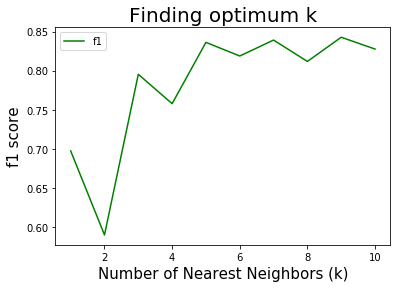

In [13]:
## Visualize how accuracy change with number of nearest neighbors!
L = []
for k in range(1,11):
    KNR = KNeighborsClassifier(n_neighbors=k)
    KNR.fit(X_train,y_train.ravel())
    y_predict = KNR.predict(X_test)
    f1 = metrics.f1_score(y_test, y_predict)
    L.append(f1)

plt.plot(range(1,11), np.array(L), c='g', label = 'f1')
plt.legend()
plt.title('Finding optimum k', size = 20)
plt.xlabel('Number of Nearest Neighbors (k)', size = 15)
plt.ylabel('f1 score',size = 15)

### <font color=red> Alternatives: Grid Search and Cross-Validation Method

In [46]:
from sklearn.model_selection import cross_val_predict, GridSearchCV

gsc = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid={
            'n_neighbors': range(1,11)
        },
        cv=5, scoring='f1') # Divide dataset into 5 parts: 4 training + 1 test

In [47]:
grid_result = gsc.fit(X_train, y_train)
rfr = grid_result.best_estimator_
prediction = rfr.predict(X_test)

/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
## Evaluation
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

print("Optimum number of clusters: ", rfr.n_neighbors)
print("f1 score:", metrics.f1_score(y_test, y_predict))
print('Jaccard index:', jaccard_similarity_score(y_test, y_predict))
print('LogLoass:',log_loss(y_test, y_predict))

Optimum number of clusters:  9
f1 score: 0.850828729281768
Jaccard index: 0.7403846153846154
LogLoass: 8.967005305703882


### <font color=blue> The optimum k is 9, and the corresponding f1-score is 0.85

### Classifier 2: Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
gsc = GridSearchCV(
        estimator=DecisionTreeClassifier(criterion="entropy"),
        param_grid={
            'max_depth': range(1,11)
        },
        cv=5, scoring='f1') # Divide dataset into 5 parts: 4 training + 1 test

In [53]:
grid_result = gsc.fit(X_train, y_train)
rfr = grid_result.best_estimator_
prediction = rfr.predict(X_test)

print("Optimum depth of tree: ", rfr.max_depth)
print("f1 score: ", metrics.f1_score(y_test, y_predict))
print('Jaccard index:', jaccard_similarity_score(y_test, y_predict))
print('LogLoass:',log_loss(y_test, y_predict))

Optimum depth of tree:  1
f1 score:  0.850828729281768
Jaccard index: 0.7403846153846154
LogLoass: 8.967005305703882


/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Classifier 3: Support Vector Machine

In [54]:
from sklearn import svm
SVM = svm.SVC() #defalt kernel: 'rbf'
SVM.fit(X_train, y_train) 
y_predict = SVM.predict(X_test)

print("f1 score: ", metrics.f1_score(y_test, y_predict))
print('Jaccard index:', jaccard_similarity_score(y_test, y_predict))
print('LogLoass:',log_loss(y_test, y_predict))

f1 score:  0.8426966292134831
Jaccard index: 0.7307692307692307
LogLoass: 9.299101236448887


/home/czl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Classifier 4: Logistic Regression 

In [55]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

print("f1 score: ", metrics.f1_score(y_test, y_predict))
print('Jaccard index:', jaccard_similarity_score(y_test, y_predict))
print('LogLoass:',log_loss(y_test, y_predict))

f1 score:  0.850828729281768
Jaccard index: 0.7403846153846154
LogLoass: 8.967005305703882


### Summary: All four models perform well in this problem!